In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime 

In [3]:
df=pd.read_excel("D:/Journal paper work/Serbia_data_new/winter.xlsx")

In [11]:
lower_limit = 6
upper_limit = 15
df = df[(df['Hour'] >= lower_limit) & (df['Hour'] <= upper_limit)]

In [12]:
df.head()

,DT,Year,Month,Day,Hour,Precipitation,Temperature,GHI,TOA Irradiance,Snowfall,Snow mass,Cloud cover,Air density,date,DayOfYear,SolarDeclination,HourAngle,SolarZenithAngle
6,2010-01-01 06:00:00,2010,1,1,6,0.3737,6.478,18.2654,62.3352,0.0,0.1661,0.5978,1.1651,2010-1-1,1,-0.401629,-1.570796,105.985219
7,2010-01-01 07:00:00,2010,1,1,7,0.3159,7.972,90.4019,250.2801,0.0,0.1597,0.6234,1.1630,2010-1-1,1,-0.401629,-1.308997,96.102853
8,2010-01-01 08:00:00,2010,1,1,8,0.2799,9.440,161.0226,403.0211,0.0,0.1509,0.6424,1.1590,2010-1-1,1,-0.401629,-1.047198,87.062881
9,2010-01-01 09:00:00,2010,1,1,9,0.2710,10.665,204.2851,502.1087,0.0,0.1404,0.7201,1.1547,2010-1-1,1,-0.401629,-0.785398,79.249404
10,2010-01-01 10:00:00,2010,1,1,10,0.2076,11.395,208.8674,540.8165,0.0,0.1288,0.7098,1.1516,2010-1-1,1,-0.401629,-0.523599,73.121136


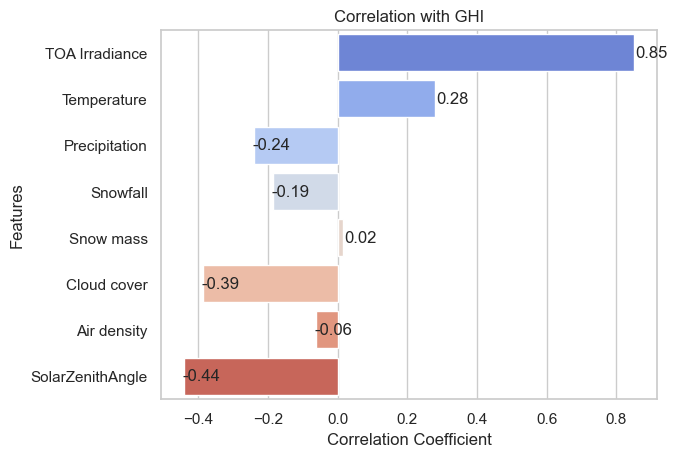

In [13]:
from sklearn import preprocessing

selected_feature = 'GHI'
selected_features = ['TOA Irradiance','Temperature','Precipitation','Snowfall','Snow mass','Cloud cover','Air density','SolarZenithAngle']
selected_data = df[selected_features + [selected_feature]].values

scaler = preprocessing.StandardScaler().fit(selected_data)
selected_data = scaler.transform(selected_data)
corr_coef = np.corrcoef(selected_data.T)
corr_with_selected_feature = corr_coef[-1, :-1]


corr_data = pd.DataFrame({'Selected Feature': selected_features, 'Correlation Coefficient': corr_with_selected_feature})
sns.set(style='whitegrid')
ax = sns.barplot(x='Correlation Coefficient', y='Selected Feature', data=corr_data, palette='coolwarm')


ax.set_xlabel('Correlation Coefficient')
ax.set_ylabel('Features')
ax.set_title(f'Correlation with {selected_feature}')

for i, corr in enumerate(corr_with_selected_feature):
    ax.text(corr + 0.05, i, f'{corr:.2f}', ha='center', va='center')

plt.show()

In [14]:
max_value1 = df['GHI'].max()
min_value1 = df['GHI'].min()

max_value2 = df['Temperature'].max()
min_value2 = df['Temperature'].min()

max_value3 = df['Cloud cover'].max()
min_value3 = df['Cloud cover'].min()

max_value4 = df['TOA Irradiance'].max()
min_value4 = df['TOA Irradiance'].min()

max_value5 = df['Air density'].max()
min_value5 = df['Air density'].min()

max_value6 = df['SolarZenithAngle'].max()
min_value6 = df['SolarZenithAngle'].min()

print("GHI(max):", max_value1)
print("GHI(min):", min_value1)

print("Temp(max):", max_value2)
print("Temp(min):", min_value2)

print("Cloud cover(max):", max_value3)
print("Cloud cover(min):", min_value3)

print("TOA Irradiance(max):", max_value4)
print("TOA Irradiance(min):", min_value4)

print("Air density(max):", max_value5)
print("Air density(min):", min_value5)

print("SolarZenithAngle(max):", max_value6)
print("SolarZenithAngle(min):", min_value6)

GHI(max): 658.4534
GHI(min): 0.001
Temp(max): 23.277
Temp(min): -20.683
Cloud cover(max): 0.9969
Cloud cover(min): 0.0
TOA Irradiance(max): 847.5261
TOA Irradiance(min): 0.0598
Air density(max): 1.3446
Air density(min): 1.126
SolarZenithAngle(max): 106.2804814571536
SolarZenithAngle(min): 53.08030506503593


In [15]:
from sklearn.preprocessing import MinMaxScaler
columns_to_normalize = ['GHI','TOA Irradiance','Temperature','Precipitation','Snowfall','Snow mass','Cloud cover','Air density','SolarZenithAngle']
scaler = MinMaxScaler()

df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df.head()

,DT,Year,Month,Day,Hour,Precipitation,Temperature,GHI,TOA Irradiance,Snowfall,Snow mass,Cloud cover,Air density,date,DayOfYear,SolarDeclination,HourAngle,SolarZenithAngle
6,2010-01-01 06:00:00,2010,1,1,6,0.178804,0.617857,0.027738,0.073484,0.0,0.002168,0.599659,0.178866,2010-1-1,1,-0.401629,-1.570796,0.994450
7,2010-01-01 07:00:00,2010,1,1,7,0.151148,0.651843,0.137293,0.295257,0.0,0.002084,0.625339,0.169259,2010-1-1,1,-0.401629,-1.308997,0.808692
8,2010-01-01 08:00:00,2010,1,1,8,0.133923,0.685237,0.244546,0.475489,0.0,0.001969,0.644398,0.150961,2010-1-1,1,-0.401629,-1.047198,0.638768
9,2010-01-01 09:00:00,2010,1,1,9,0.129665,0.713103,0.310249,0.592412,0.0,0.001832,0.722339,0.131290,2010-1-1,1,-0.401629,-0.785398,0.491899
10,2010-01-01 10:00:00,2010,1,1,10,0.099330,0.729709,0.317208,0.638086,0.0,0.001681,0.712007,0.117109,2010-1-1,1,-0.401629,-0.523599,0.376706


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [19]:
X=df[['Hour','TOA Irradiance','Temperature','Precipitation','Snowfall','Snow mass','Cloud cover','Air density','SolarZenithAngle']]
y=df[['GHI']]

In [26]:
split_index = int(len(X) * 0.9)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

rmse_rf = mean_squared_error(y_test, y_pred, squared=False)
mae_rf = mean_absolute_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

max_value = 658.4534
min_value = 0
original_rmse = rmse_rf * (max_value - min_value) + min_value
original_mae = mae_rf * (max_value - min_value) + min_value

print('RMSE:', original_rmse)
print('MAE:', original_mae)
print('R-squared:', r2_rf)

C:\Users\suraj\AppData\Local\Temp\ipykernel_7236\3541248678.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


RMSE: 27.512525875355227
MAE: 17.72261924454578
R-squared: 0.9646278464231274


In [27]:
y_test = np.squeeze(y_test)
max_val = 658.4534
min_val = 0
y_test_actual = y_test * (max_val - min_val) + min_val
y_pred_actual = y_pred * (max_val - min_val) + min_val
y_test_actual = np.round(y_test_actual, 3)
y_pred_actual = np.round(y_pred_actual, 3)

cross_checking = pd.DataFrame({'Actual': y_test_actual, 'Predicted': y_pred_actual})
print(cross_checking.head(20))

        Actual  Predicted
23366   42.409     41.816
23367    0.239      0.267
23382   25.940     22.015
23383  101.358     84.378
23384  170.850    136.631
23385  205.804    198.034
23386  207.155    226.974
23387  185.039    229.486
23388  149.432    212.003
23389  102.256    134.005
23390   39.182     46.876
23391    0.316      0.416
23406   11.576     13.399
23407   62.267     71.132
23408  133.052    129.975
23409  189.583    185.047
23410  220.955    215.932
23411  221.498    210.974
23412  191.124    187.026
23413  128.161    123.430


In [28]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

rmse_svr = mean_squared_error(y_test, y_pred, squared=False)
mae_svr = mean_absolute_error(y_test, y_pred)
r2_svr = r2_score(y_test, y_pred)

max_value = 658.4534
min_value = 0
original_rmse = rmse_svr * (max_value - min_value) + min_value
original_mae = mae_svr * (max_value - min_value) + min_value

print('RMSE:', original_rmse)
print('MAE:', original_mae)
print('R-squared:', r2_svr)

C:\Users\suraj\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE: 49.19577784647716
MAE: 37.950781596400695
R-squared: 0.8869016582569602


In [29]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)


max_value = 658.4534
min_value = 0
original_rmse = rmse_knn * (max_value - min_value) + min_value
original_mae = mae_knn * (max_value - min_value) + min_value

print('RMSE:', original_rmse)
print('MAE:', original_mae)
print('R-squared:', r2_knn)

RMSE: 44.65413884244718
MAE: 29.859858426110343
R-squared: 0.9068197200944713


In [30]:
from sklearn.neural_network import MLPRegressor

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPRegressor(hidden_layer_sizes=(40, 40, 40, 40, 40), activation='relu', solver='adam', max_iter=100, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_test_scaled)

rmse_ann = mean_squared_error(y_test, y_pred, squared=False)
mae_ann = mean_absolute_error(y_test, y_pred)
r2_ann = r2_score(y_test, y_pred)

max_value = 658.4534
min_value = 0
original_rmse = rmse_ann * (max_value - min_value) + min_value
original_mae = mae_ann * (max_value - min_value) + min_value

print('RMSE:', original_rmse)
print('MAE:', original_mae)
print('R-squared:', r2_ann)

C:\Users\suraj\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE: 33.00381344574184
MAE: 22.05069448587746
R-squared: 0.9490987062215052
